In [8]:
%pylab inline
from astropy import units
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [125]:
c = constants.c
mp = constants.m_p
Kb = constants.k_B
e = constants.e
me = constants.m_e

In [126]:
c = c.to(units.kpc / units.Gyr)
c

<Quantity 306601.39378795266 kpc / Gyr>

In [127]:
units.pc.to(units.m)

3.0856775814671916e+16

In [128]:
T = c**2 * mp / (30 * Kb)
T = T.to(units.K)

In [129]:
print T

3.62939869079e+11 K


In [130]:
#b.

In [133]:
gamma = (3.0/2.0 * Kb * T / (me * c**2)) 
gamma = gamma.to(units.m / units.m)

In [134]:
print gamma

91.8076335974


In [48]:
B = 1E4 * units.Gauss
B = B.to(units.kg / units.C / units.s )
print B

1.0 kg / (C s)


In [50]:
wb = e.value * units.C  * B / (gamma * me *c)
wb = wb.to(1/units.m)
print wb

6.32145448039 1 / m


In [39]:
print e.value * units.C

1.602176565e-19 C


In [120]:
peak = wb * gamma **3 * 0.28 * 3 / (4 * pi)
print peak

337782.80254 1 / m


# 2

## B 

$L_{\nu} = \int \int B_{\nu} d\nu dA d\Omega$

# 3 

#a)  According to observational 'experience'the equivalent width is $W = \sim 1\AA$

b) That corresponds to a point near 15 in xscale and -3.77 in the yscale

In [254]:
y = np.log10(0.75 / 5890.)
print y

-3.8950540314


#C)

In [60]:
N = 10**(15) / (0.645 * (5890/5000))
print N

1.5503875969e+15


In [61]:
#D)

In [65]:
DE = constants.h * c / (5890 * units.Angstrom)
DE =  DE.to(units.J)
print DE

3.37257331625e-19 J


In [85]:
NbNa  = 3 * np.exp(-DE /(Kb * 6000*units.K))
print NbNa

0.0511685692871


In [86]:
#E)
T = 6000 * units.K
X = 5.1 * units.eV
ZII = 1.0
ZI = 2.4
P = 200 * units.dyne / units.cm**2
NIINI = 2.0 * Kb * T * ZII / (P * ZI) * ( 2.0 * np.pi * me * Kb * T / constants.h**2.0 )**(3.0/2.0) * np.exp(-X/(Kb * T))

In [103]:
NIINI =  NIINI.to(units.kg/units.kg)
print NIINI
P = P.to(units.N/units.m**2)
print P

201.510789796
20.0 N / m2


In [104]:
#F)
NII = N * (1 + 0.05) * (NIINI + 1)

In [105]:
NII

<Quantity 3.296687275753456e+17>

In [95]:
NIINI

<Quantity 201.51078979628372>

In [106]:
1/0.8 

1.25

In [110]:
#2c

In [114]:
alpha = 2.59E-13 * units.cm**3 / units.s
nh = 10 / units.cm**3
Naa = 7.1E50 / units.s
rs = (3*Naa/(4*np.pi*alpha))**(1.0/3.0) * nh**(-2.0/3.0)

In [117]:
print rs.to(units.pc)

60.6186294801 pc


In [119]:
alpha = 2.59E-13 * units.cm**3 / units.s
nh = 10 / units.cm**3
Naa = 3.056E50 / units.s
rs2 = (3*Naa/(4*np.pi*alpha))**(1.0/3.0) * nh**(-2.0/3.0)
print rs2.to(units.pc)

45.7689673221 pc


In [136]:
#2

In [138]:
def planck_function(nu, T):
    constant = 2.*h*nu**3 / c**2
    return constant / (np.exp(h*nu/k_B/T) - 1.)

def integrand(nu, T):
    return np.pi / h / nu * planck_function(nu, T) * alpha_nu* (nu_0/nu)**3


In [169]:
#from scipy.integrate import quad
h = constants.h.cgs.value
k_B = constants.k_B.cgs.value
c = constants.c.cgs.value

T_eff = 40e+3 
nu_0 = 3.2871e+15
alpha_nu = 6.3e-18

integral = quad(integrand, nu0.value , infty,args=(T_eff))


In [170]:
print integral

(-8.792103384170412e-09, 4.0525072097159097e-17)


In [163]:
L0 = 900.0 * units.Angstrom
c = constants.c
nu0 =  c / L0.to(units.m)
print nu0

3.33102731111e+15 1 / s


In [164]:
R = 11 * units.Rsun
alpha = 2.59E-13 * units.cm**3 / units.s
Nh = 10/ units.cm**3
a_nu = 6.3E-18 * units.cm**2

In [165]:
Const = 2 * np.pi**2 * R**2 * a_nu * nu0**3 / (Nh * alpha * c**2 )

In [167]:
print Const.to(units.kpc**2)

121.381427441 kpc2


In [194]:
def exponential(x, R):
    return exp(-a_nu.to(units.km**2).value * (1 - x)*R * Nh.value)

In [205]:
exponential(, R.value)

1.0

In [193]:
a_nu.to(units.km**2) * R.to(units.km)

<Quantity 4.81987044e-21 km3>

In [207]:
D = 121.38 * units.kpc * (- 8.7E-9)
print D

-1.056006e-06 kpc


In [223]:
XX = linspace(0.1, 121, 100)
ioni = []
for x in XX:
    io =  (- D.value / x**2 + sqrt((D.value/x)**2 - 4*(D.value/x)))/2
    ioni.append(io)
    

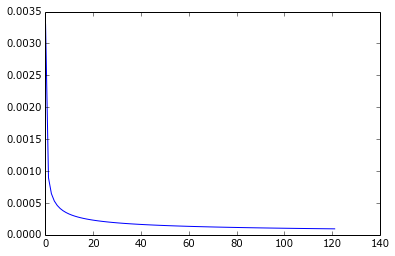

In [255]:
plot(XX, ioni)

In [228]:
#B)

In [246]:
def planck_function(nu, T):
    c1 = constants.c
    k_B = constants.k_B.value
    constant = 2.*h.value*nu**3 / c1.value**2
    return constant / (np.exp(h.value*nu/k_B/T) - 1.)

def integrand2(nu, T):
    c1 = constants.c
    R1 = 11 * units.Rsun
    R1 = R1.to(units.m)
    h = constants.h
    return 8 * np.pi * R1.value**2 / h.value / nu / c1.value**2 * planck_function(nu, T) 

In [248]:
T_eff = 40e+3 

integral = quad(integrand2, nu0.value , infty,args=(T_eff))
print integral

(-7.566347427617054e+16, 145150752.0)
